In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from afinn import Afinn
from src.DataIngestor import DataIngestor
from src.DataCleaner import DataCleaner

In [5]:
#importing and cleaning of googleplaystore dataset
afn = Afinn()
di = DataIngestor()
google_dataframe = di.read_file('./database/googleplaystore.csv')
dc = DataCleaner()
dc.clean_all(google_dataframe)
google_dataframe.head(10)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,4.3,3.0,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,12000000.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015"


In [3]:
#importing and cleaning of google reviews dataset

reviews = di.read_file('./database/googleplaystore_user_reviews.csv')
# removing na values from review since it's important to know it's content, 26868 rows are filled with nan
dc.remove_na(reviews,'Translated_Review')
# removing unnecessary columns
reviews = reviews.drop(columns=['Sentiment', 'Sentiment_Polarity','Sentiment_Subjectivity'])
# UMBERTO?
reviews.reset_index(inplace=True)
reviews.drop('index',axis=1,inplace=True)
# cleaning done
reviews

,App,Translated_Review
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...
1,10 Best Foods for You,This help eating healthy exercise regular basis
2,10 Best Foods for You,Works great especially going grocery store
3,10 Best Foods for You,Best idea us
4,10 Best Foods for You,Best way
...,...,...
37422,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...
37423,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm..."
37424,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt..."
37425,Housing-Real Estate & Property,I property business got link SMS happy perform...


In [4]:
# merging of reviews dataset with category column of google dataset. Correct category for each app's review.

#reviews_complete = pd.merge(google_dataframe, reviews[['App','Translated_Review']],how='left',on='App')
# 44K+ rows
#reviews_complete.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Translated_Review
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",A kid's excessive ads. The types ads allowed a...
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",It bad >:(
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",like
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",I love colors inspyering


In [4]:
#creation of the list contains the negative and positive words to use with 'AFINN method'.
# UMBERTO?
negative = pd.read_excel('./database/n.xlsx')
negative = negative.values.tolist()
# UMBERTO?
positive = pd.read_excel('./database/p.xlsx')
positive = positive.values.tolist()

import itertools

# UMBERTO?
lista_appiattita_p = list(itertools.chain.from_iterable(positive))
lista_appiattita_n = list(itertools.chain.from_iterable(negative))

lista = lista_appiattita_n + lista_appiattita_p




In [5]:
# implement a function that replace the Translated_Revies with matched words in the negative and positive words list.

def replace_common_strings(dataframe, col_name, string_list):
    dataframe[col_name] = dataframe[col_name].apply(lambda x: " ".join([string for string in str(x).split() if string in string_list]))
    return dataframe

In [16]:
#the function work correctly
replace_common_strings(reviews, 'Translated_Review', lista)

,App,Translated_Review,Score
0,10 Best Foods for You,like delicious,5.0
1,10 Best Foods for You,healthy,2.0
2,10 Best Foods for You,great,3.0
3,10 Best Foods for You,,0.0
4,10 Best Foods for You,,0.0
...,...,...,...
37422,Housing-Real Estate & Property,wrong,-2.0
37423,Housing-Real Estate & Property,issue improve,2.0
37424,Housing-Real Estate & Property,,0.0
37425,Housing-Real Estate & Property,happy,3.0


In [17]:
reviews.head()

,App,Translated_Review,Score
0,10 Best Foods for You,like delicious,5.0
1,10 Best Foods for You,healthy,2.0
2,10 Best Foods for You,great,3.0
3,10 Best Foods for You,,0.0
4,10 Best Foods for You,,0.0


In [18]:
# creating Score column for each review
reviews['Score'] = reviews['Translated_Review'].apply(afn.score)
reviews.head(5)

,App,Translated_Review,Score
0,10 Best Foods for You,like delicious,5.0
1,10 Best Foods for You,healthy,2.0
2,10 Best Foods for You,great,3.0
3,10 Best Foods for You,,0.0
4,10 Best Foods for You,,0.0


In [29]:
app_score = reviews.groupby(by='App').agg({'Score':'mean'}).reset_index()

In [32]:
# 
google_dataframe = pd.merge(google_dataframe, app_score, how='left', on='App')
google_dataframe.sort_values(by='Score',ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Score
382,"CallApp: Caller ID, Blocker & Phone Call Recorder",COMMUNICATION,4.4,483565.0,20000000.0,10000000,Free,0.0,Everyone,Communication,"July 29, 2018",9.000000
1498,Fallout Shelter,GAME,4.6,2719142.0,25000000.0,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",8.125000
2070,Couple - Relationship App,SOCIAL,4.0,33249.0,8.4,1000000,Free,0.0,Everyone,Social,"March 5, 2015",7.608696
2863,Daniel Tiger for Parents,PARENTING,4.7,247.0,28000000.0,100000,Free,0.0,Everyone,Parenting;Music & Video,"March 19, 2018",7.333333
2800,Calendar+ Schedule Planner App,PRODUCTIVITY,4.0,8985.0,5.7,1000000,Free,0.0,Everyone,Productivity,"January 16, 2017",6.000000


In [42]:
paid_apps = google_dataframe[google_dataframe['Type'] == 'Paid']
top_5_paid = paid_apps["App","Category","Score"].sort_values(by='Score',ascending=False).head(5)


,App,Category,Score
1723,Dr. Panda & Toto's Treehouse,FAMILY,4.527778
1761,Diabetes & Diet Tracker,MEDICAL,2.648649
1754,Essential Anatomy 3,MEDICAL,2.550000
1492,Farming Simulator 18,GAME,1.974359
2673,Beautiful Widgets Pro,PERSONALIZATION,1.945946


In [43]:
worst_5_paid = paid_apps["App","Category","Score"].sort_values(by='Score',ascending=True).head(5)
worst_5_paid

,App,Category,Score
1494,Call of Duty:Black Ops Zombies,GAME,-1.333333
2707,BIG Launcher,PERSONALIZATION,0.675000
2675,HD Widgets,PERSONALIZATION,1.322581
2375,Golfshot Plus: Golf GPS,SPORTS,1.925000
2673,Beautiful Widgets Pro,PERSONALIZATION,1.945946


In [56]:
google_dataframe.groupby(by='Category')['Score'].mean().sort_values(ascending=False).head(1).index[0]

'PARENTING'

In [47]:
anova = google_dataframe.groupby(by='Content Rating')['Price'].mean()
anova

Content Rating
Adults only 18+    0.000000
Everyone           1.229761
Everyone 10+       0.433851
Mature 17+         0.259847
Teen               0.633475
Unrated            0.000000
Name: Price, dtype: float64

In [45]:
anova_paid_apps = paid_apps.groupby(by='Content Rating')['Price'].mean()
anova_paid_apps

Content Rating
Everyone        14.839740
Everyone 10+     4.506452
Mature 17+       5.673333
Teen            12.620769
Name: Price, dtype: float64

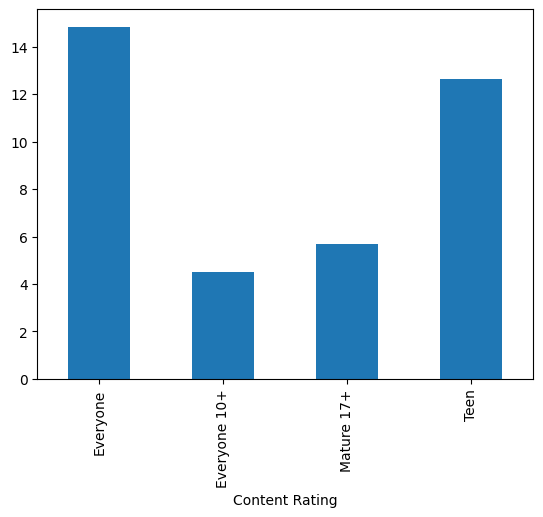

In [49]:
anova_paid_apps.plot.bar()
plt.show()

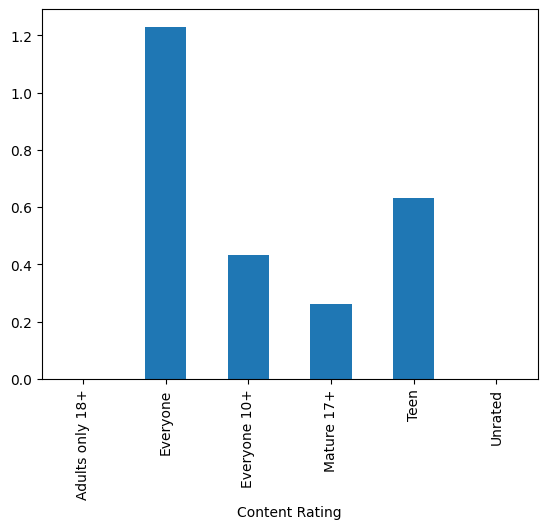

In [50]:
anova.plot.bar()
plt.show()